In [26]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt

# Import Data

In [2]:
eda = pd.read_csv("data/merge_sampled.csv")

In [3]:
eda

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,3/9/2017,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,4/7/2017,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,5/28/2017,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6/13/2017,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,7/16/2017,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,1/2/2018,0.458911,0.124405,0.597829,0.023698,0.004703,0.162860,0.000963,0.627714,...,NaN,NaN,0.004281,0.003969,0.003936,NaN,0.006478,0.003046,0.004138,0
99996,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,2/27/2018,0.363298,0.038383,0.675999,0.023201,0.006627,0.160133,0.000720,0.822903,...,NaN,NaN,0.004239,0.008563,0.003117,NaN,0.006679,0.007450,0.002982,0
99997,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,3/8/2018,0.356621,0.036849,0.645728,0.020585,0.004587,0.166246,0.003972,0.871214,...,NaN,NaN,0.009920,0.005579,0.008481,NaN,0.001516,0.005997,0.004767,0
99998,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,3/29/2017,0.714477,0.000546,0.008019,0.817670,0.006265,NaN,0.008652,0.008341,...,NaN,NaN,1.006665,0.003085,0.914985,0.351957,1.001686,0.579711,0.454960,0


# Target Stratification

There are no missing values out of range values. Of the 8294 customer_IDs, 6096 (73.4 %) have a label of 0 (good customer, no default) and 2198 (26.5 %) have a label of 1 (bad customer, default).

The competition info tells us that good customers have been subsampled by a factor of 20; this means that in the real world,  98 % of the customers are good and 2 % are bad.

In [6]:
eda.target.isna().sum()

0

In [9]:
eda[eda.target > 1]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target


In [10]:
eda[eda.target < 0]

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target


In [14]:
# unique customer IDs
eda.customer_ID.nunique()

8294

In [20]:
bad = eda[eda.target == 1]
bad

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
104,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,3/15/2017,0.400025,0.000278,0.954861,0.023890,0.003140,NaN,0.008421,1.175081,...,NaN,NaN,1.002518,0.001170,0.870115,0.141214,1.003923,0.008945,0.736632,1
105,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,4/14/2017,0.405788,0.000269,0.944042,0.025613,0.008950,NaN,0.003707,1.177973,...,NaN,NaN,1.005944,0.003116,0.864712,0.145885,1.004833,0.002125,0.733311,1
106,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,5/15/2017,0.403615,0.032850,0.940261,0.026016,0.009074,NaN,0.008000,1.175785,...,NaN,NaN,1.006883,0.004455,0.871729,0.144555,1.000521,0.000765,0.729252,1
107,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,6/14/2017,0.391495,0.034461,0.936253,0.029538,0.005778,NaN,0.002849,1.174704,...,NaN,NaN,1.000132,0.002175,0.869414,0.151890,1.001034,0.008195,0.727660,1
108,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,7/15/2017,0.392356,0.037955,0.915764,0.028671,0.008595,NaN,0.002428,1.177958,...,NaN,NaN,1.001192,0.004609,0.869089,0.152654,1.007116,0.001493,0.727649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99954,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,11/24/2017,0.508168,0.031211,0.728673,0.024651,0.000430,0.214742,0.009083,1.005197,...,NaN,NaN,1.007616,0.007317,0.943896,0.414324,1.003824,0.291847,0.099427,1
99955,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,12/25/2017,0.527567,0.036217,0.725777,0.024589,0.251386,0.208348,0.008015,1.003667,...,NaN,NaN,1.006324,0.000010,0.950824,0.413562,1.001365,0.298827,0.095157,1
99956,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,1/25/2018,0.526164,0.035330,0.714960,0.026882,0.251946,0.209647,0.005900,1.007715,...,NaN,NaN,1.001821,0.001326,0.951614,0.417832,1.004149,0.297445,0.100708,1
99957,049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a1...,2/22/2018,0.498874,0.038715,0.709952,0.021511,0.254056,0.211477,0.001525,0.998875,...,NaN,NaN,1.006805,0.007966,0.950035,0.421610,1.000564,0.349198,0.099730,1


In [21]:
good = eda[eda.target == 0]
good

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,3/9/2017,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,4/7/2017,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,5/28/2017,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,6/13/2017,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,7/16/2017,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,1/2/2018,0.458911,0.124405,0.597829,0.023698,0.004703,0.162860,0.000963,0.627714,...,NaN,NaN,0.004281,0.003969,0.003936,NaN,0.006478,0.003046,0.004138,0
99996,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,2/27/2018,0.363298,0.038383,0.675999,0.023201,0.006627,0.160133,0.000720,0.822903,...,NaN,NaN,0.004239,0.008563,0.003117,NaN,0.006679,0.007450,0.002982,0
99997,049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...,3/8/2018,0.356621,0.036849,0.645728,0.020585,0.004587,0.166246,0.003972,0.871214,...,NaN,NaN,0.009920,0.005579,0.008481,NaN,0.001516,0.005997,0.004767,0
99998,049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...,3/29/2017,0.714477,0.000546,0.008019,0.817670,0.006265,NaN,0.008652,0.008341,...,NaN,NaN,1.006665,0.003085,0.914985,0.351957,1.001686,0.579711,0.454960,0


In [22]:
good.customer_ID.nunique()

6096

In [23]:
bad.customer_ID.nunique()

2198

In [4]:
label_stats = pd.DataFrame({'absolute': eda.target.value_counts(),
              'relative': eda.target.value_counts() / len(eda)})
label_stats['absolute upsampled'] =  label_stats.absolute * np.array([20, 1])
label_stats['relative upsampled'] = label_stats['absolute upsampled'] / label_stats['absolute upsampled'].sum()
label_stats

,absolute,relative,absolute upsampled,relative upsampled
0,74613,0.74613,1492260,0.983272
1,25387,0.25387,25387,0.016728


# Null Values

In [5]:
eda.info(max_cols=200, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 191 columns):
 #    Column       Non-Null Count   Dtype  
---   ------       --------------   -----  
 0    customer_ID  100000 non-null  object 
 1    S_2          100000 non-null  object 
 2    P_2          99214 non-null   float64
 3    D_39         100000 non-null  float64
 4    B_1          100000 non-null  float64
 5    B_2          99963 non-null   float64
 6    R_1          100000 non-null  float64
 7    S_3          81374 non-null   float64
 8    D_41         99963 non-null   float64
 9    B_3          99963 non-null   float64
 10   D_42         14614 non-null   float64
 11   D_43         69805 non-null   float64
 12   D_44         94947 non-null   float64
 13   B_4          100000 non-null  float64
 14   D_45         99963 non-null   float64
 15   B_5          100000 non-null  float64
 16   R_2          100000 non-null  float64
 17   D_46         78158 non-null   float64
 18   D_4

In [28]:
null_hist = eda.isna().sum().div(len(eda)).mul(100).sort_values(ascending=False)

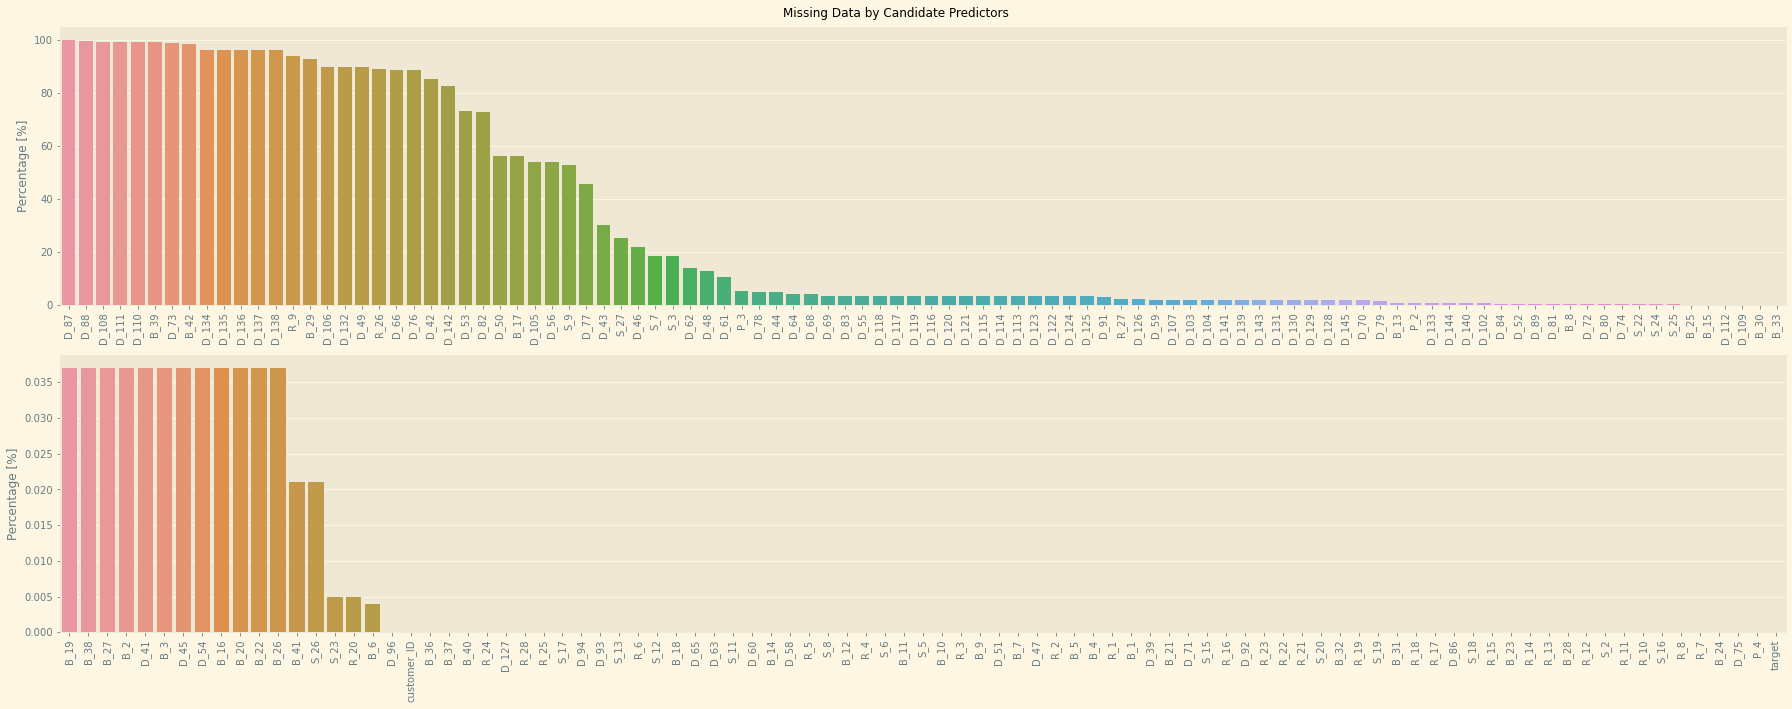

In [33]:
plt.style.use('tableau-colorblind10')
fig, ax = plt.subplots(2,1, figsize=(25,10))
sns.barplot(x=null_hist[:100].index, y=null_hist[:100].values, ax=ax[0])
sns.barplot(x=null_hist[100:].index, y=null_hist[100:].values, ax=ax[1])
ax[0].set_ylabel("Percentage [%]"), ax[1].set_ylabel("Percentage [%]")
ax[0].tick_params(axis='x', rotation=90); ax[1].tick_params(axis='x', rotation=90)
plt.suptitle("Missing Data by Candidate Predictors")
plt.tight_layout()
plt.savefig('figs/null_vars.png', dpi=425, bbox_inches='tight')
plt.show()

In [49]:
NA = pd.DataFrame(data=[eda.isna().sum().tolist(), ["{:.2f}".format(i)+'%' \
           for i in (eda.isna().sum()/eda.shape[0]*100).tolist()]], 
           columns=eda.columns, index=['NA Count', 'NA Percent']).transpose()

NA.style.background_gradient(cmap="Pastel1_r", subset=['NA Count'])

,NA Count,NA Percent
customer_ID,0,0.00%
S_2,0,0.00%
P_2,786,0.79%
D_39,0,0.00%
B_1,0,0.00%
B_2,37,0.04%
R_1,0,0.00%
S_3,18626,18.63%
D_41,37,0.04%
B_3,37,0.04%


# Categorical Variables

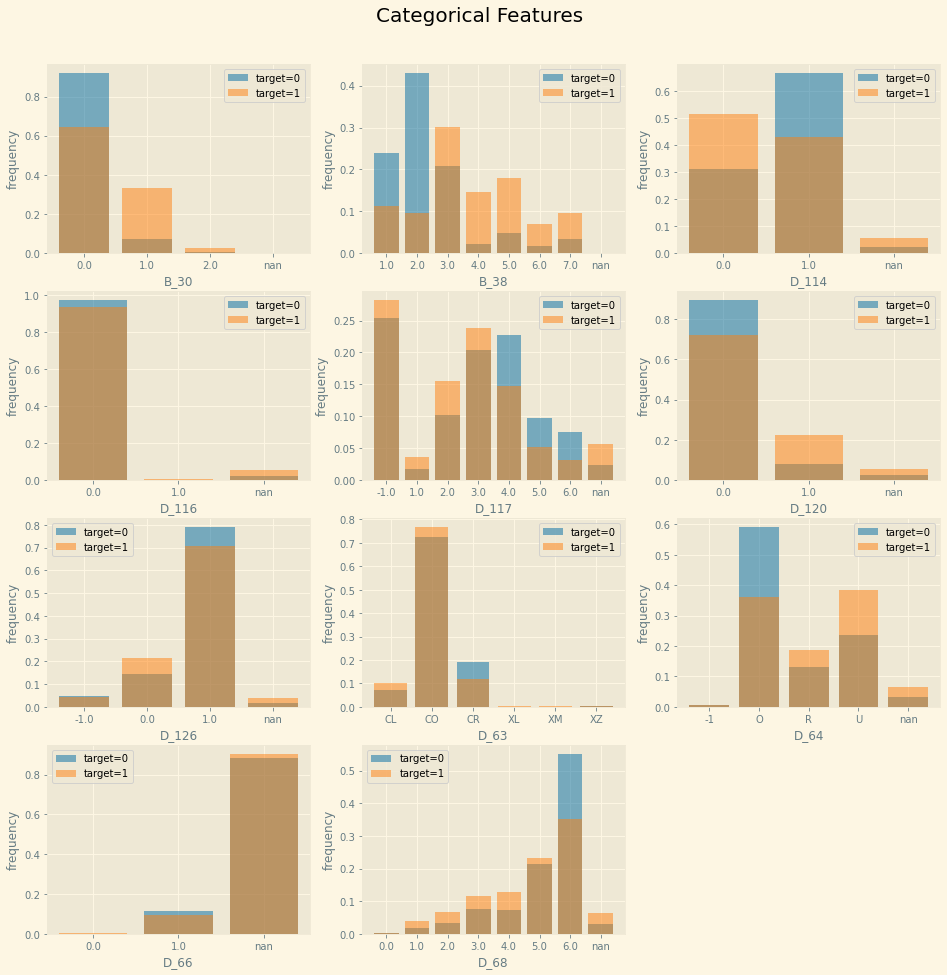

In [35]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
plt.figure(figsize=(16, 16))
for i, f in enumerate(cat_features):
    plt.subplot(4, 3, i+1)
    temp = pd.DataFrame(eda[f][eda.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(eda[f][eda.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.suptitle('Categorical Features', fontsize=20, y=0.93)
plt.savefig('figs/cat_vars.png', dpi=425, bbox_inches='tight')
plt.show()
del temp

# Continuous Variables

177


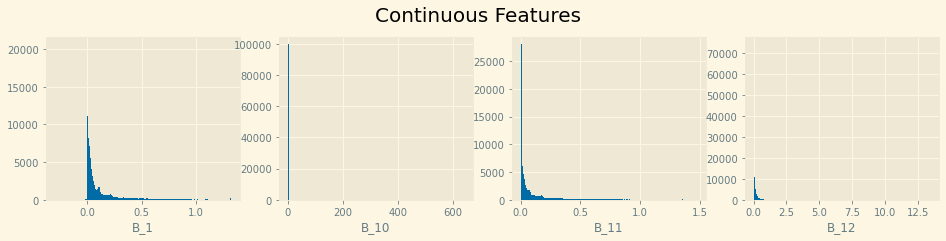

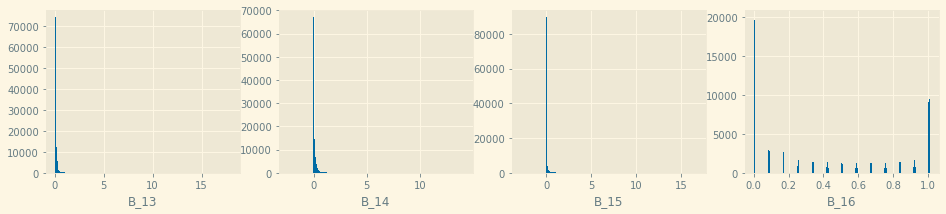

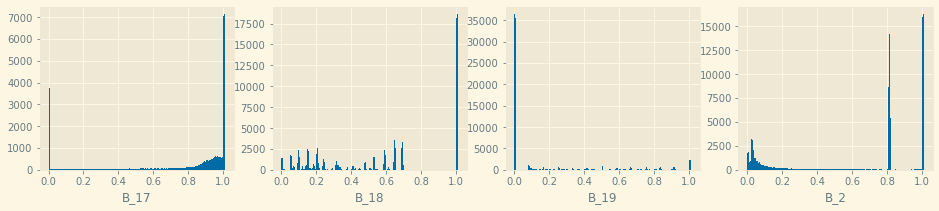

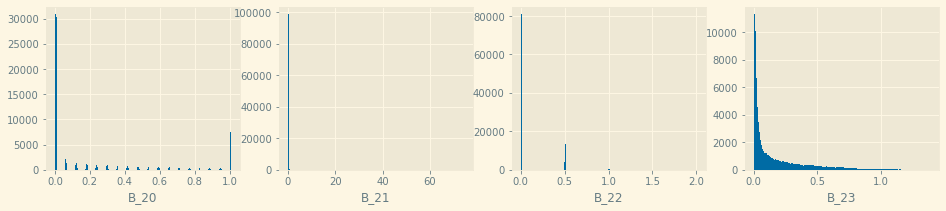

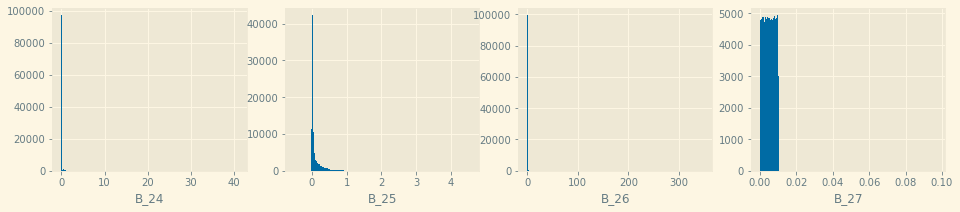

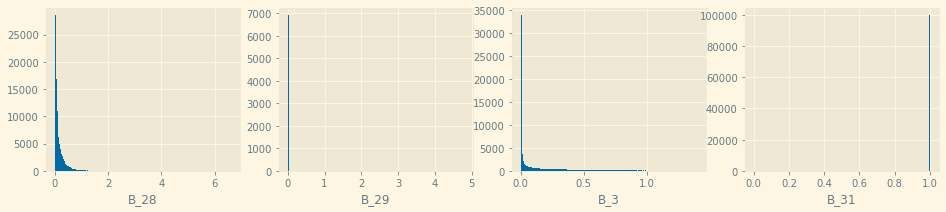

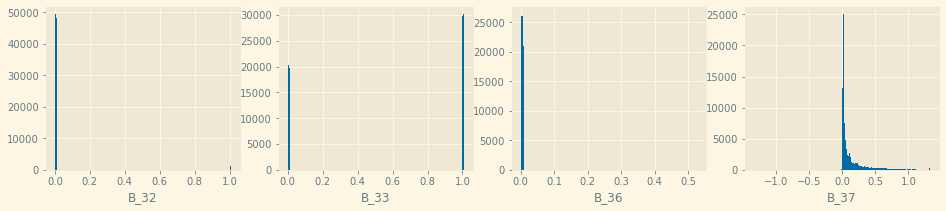

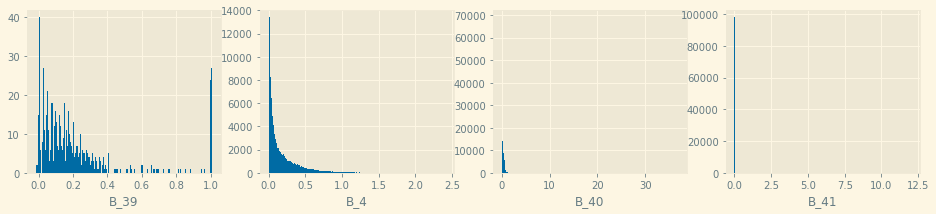

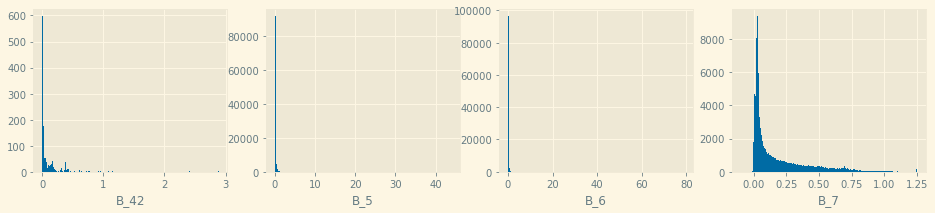

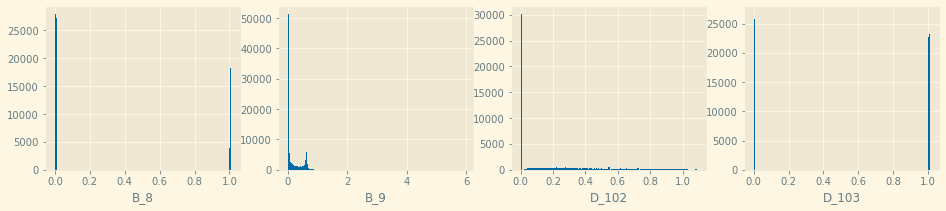

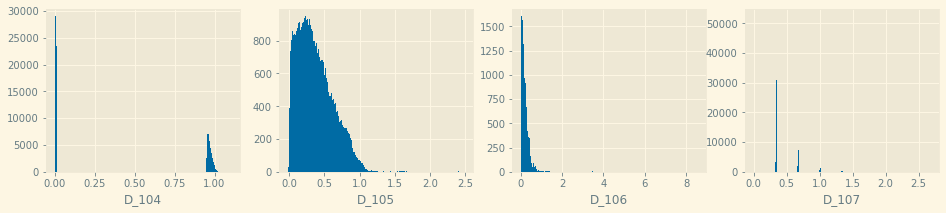

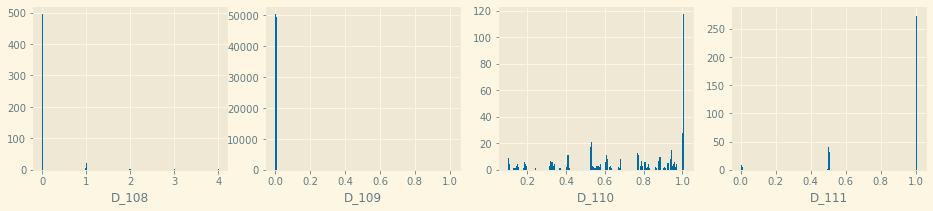

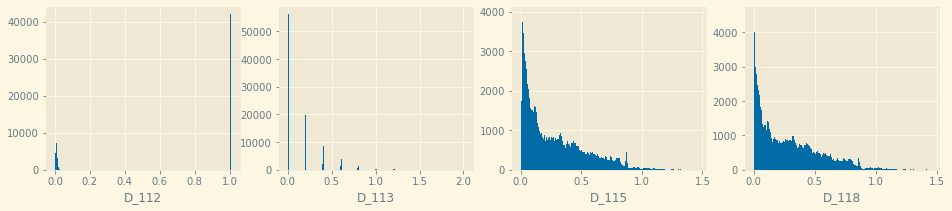

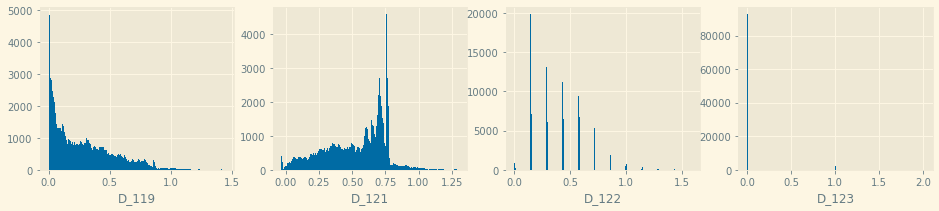

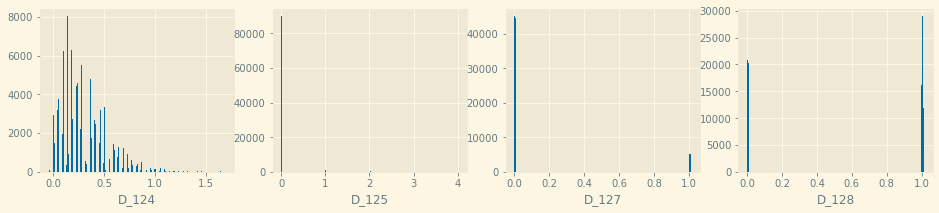

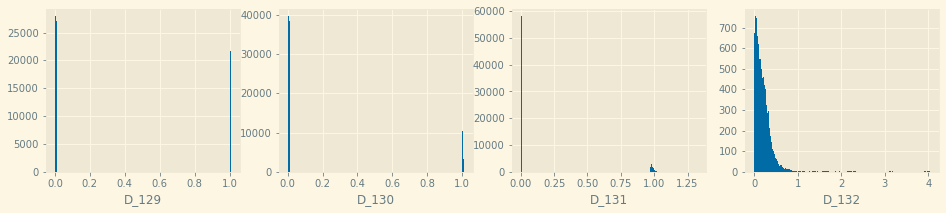

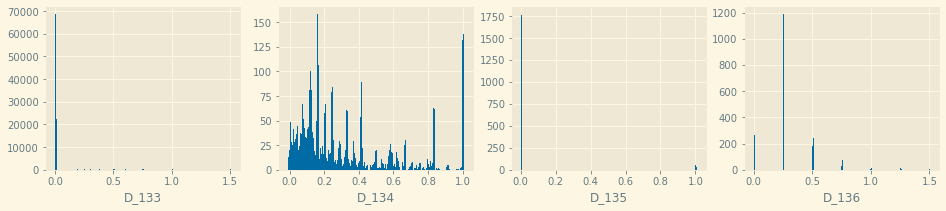

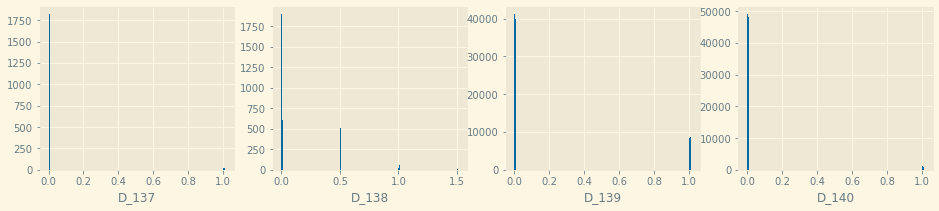

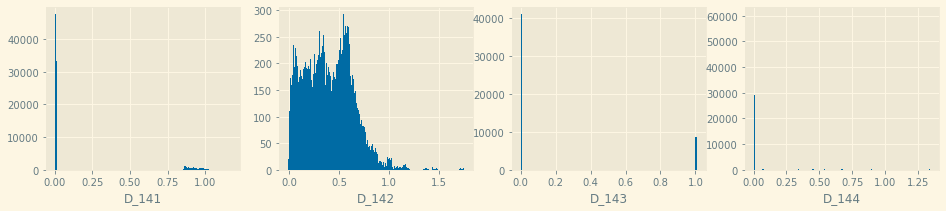

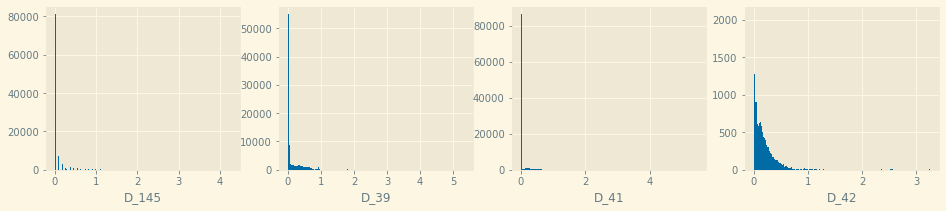

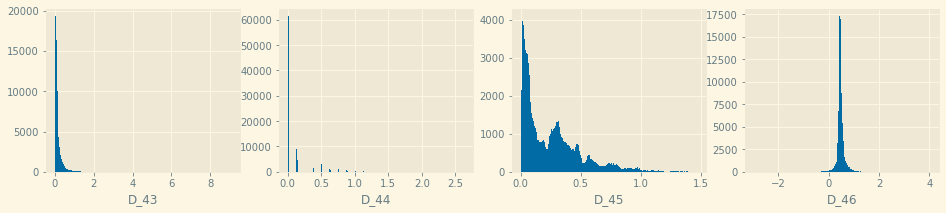

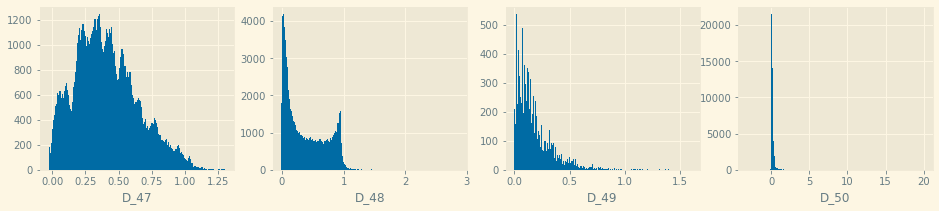

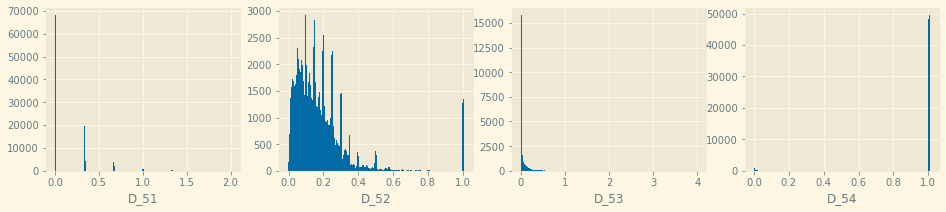

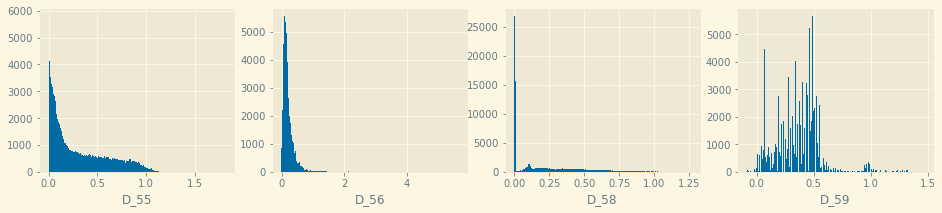

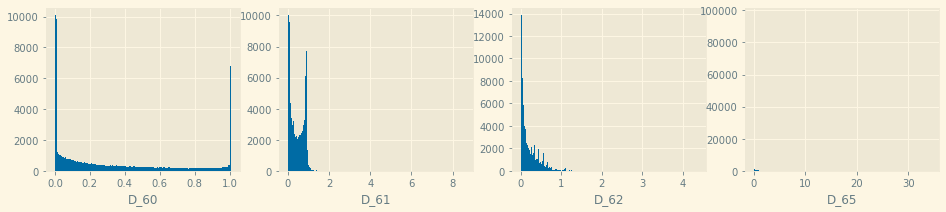

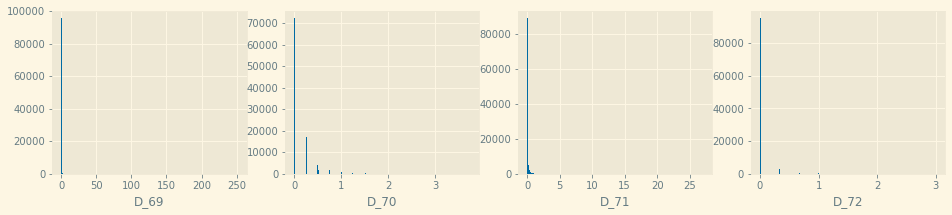

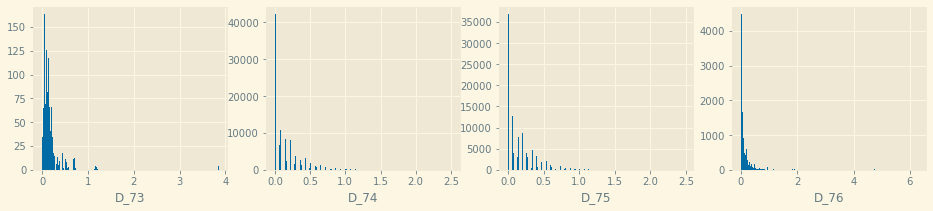

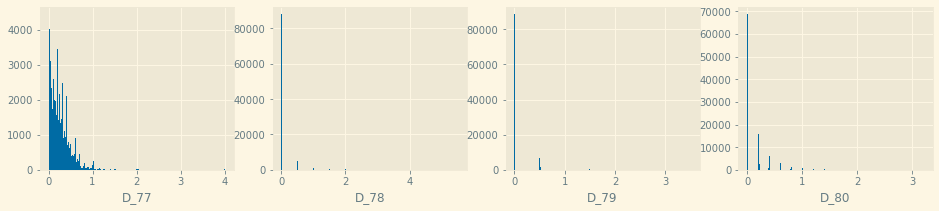

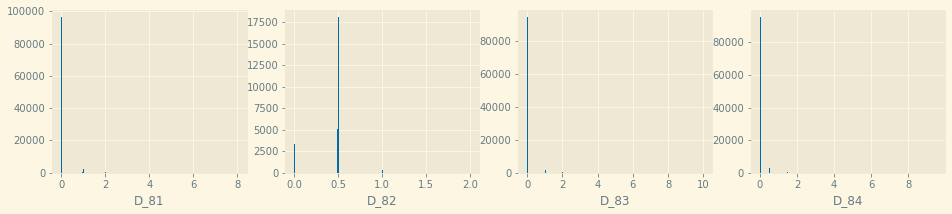

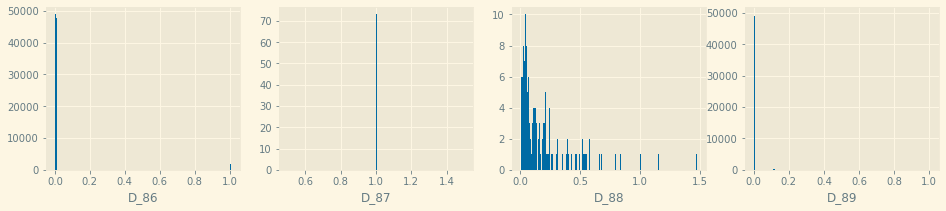

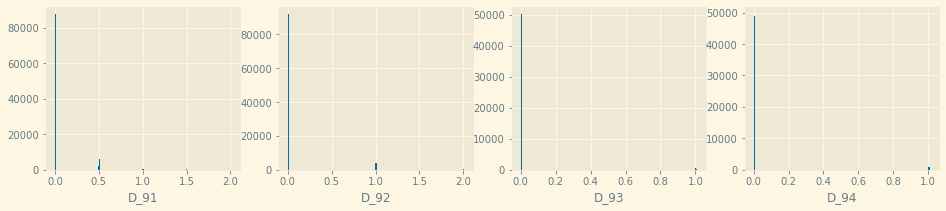

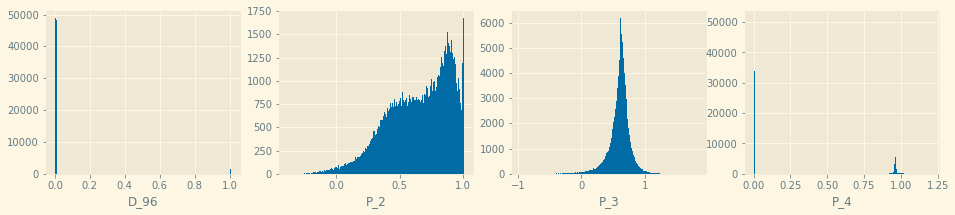

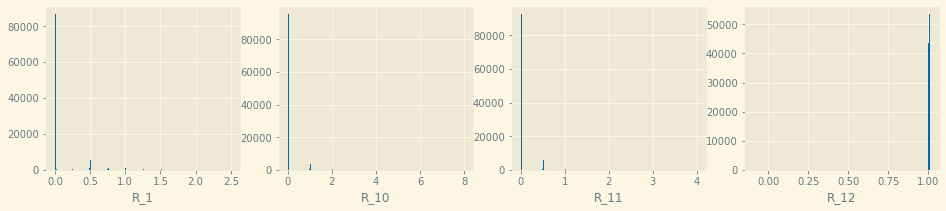

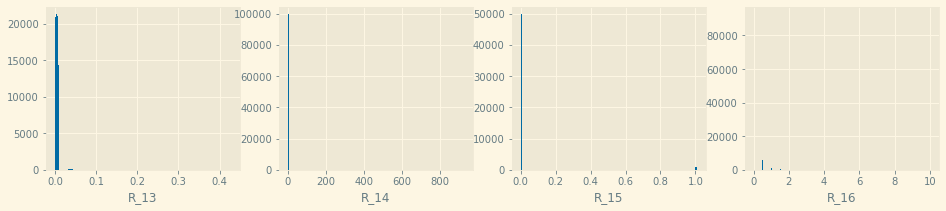

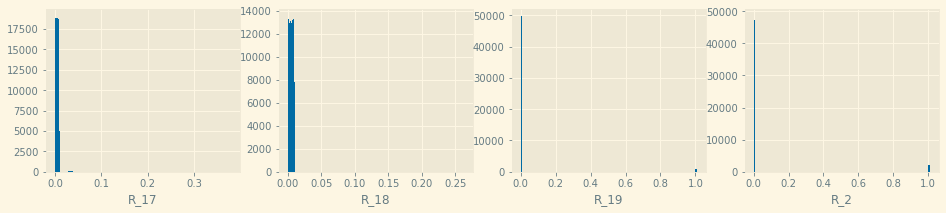

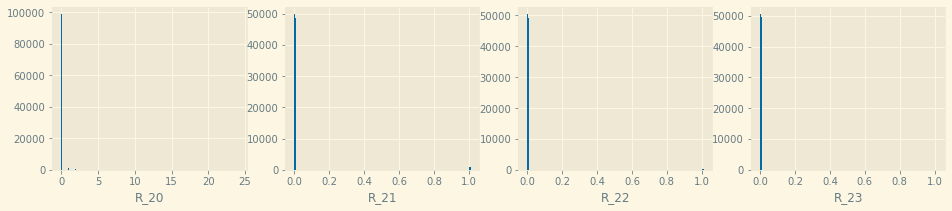

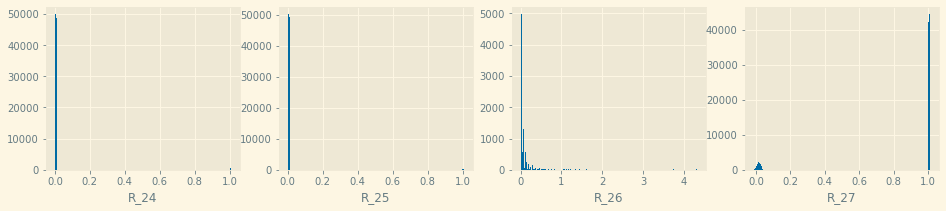

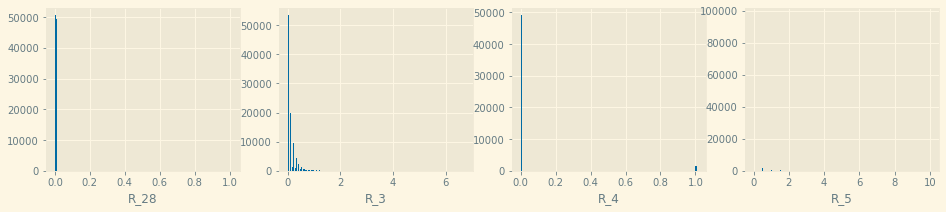

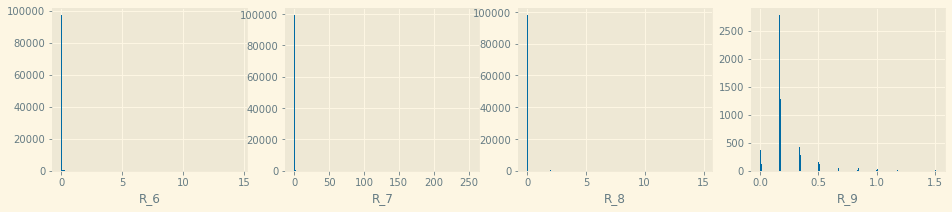

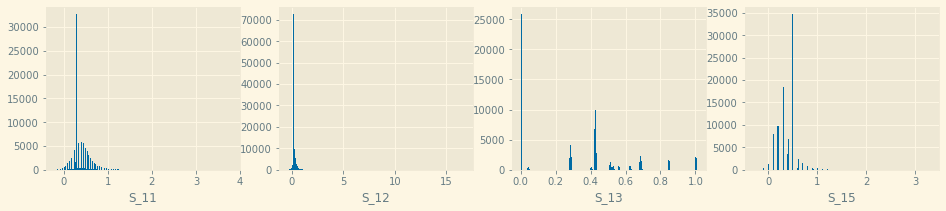

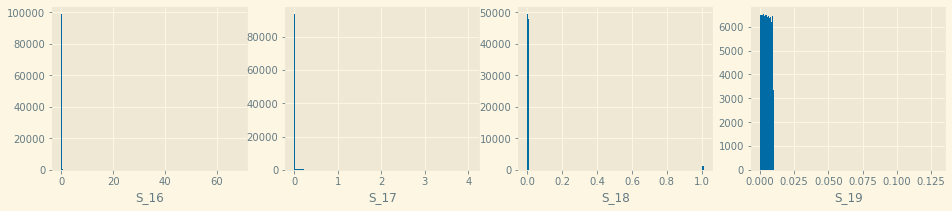

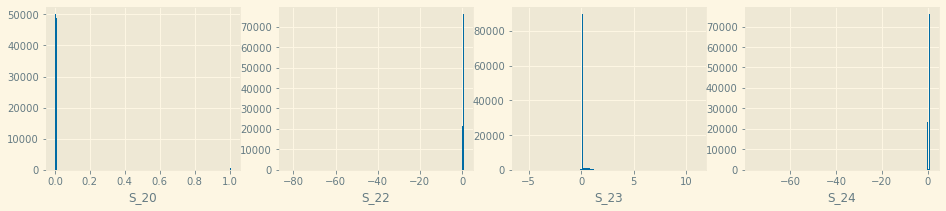

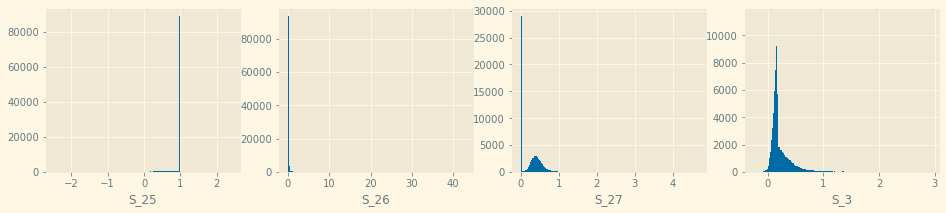

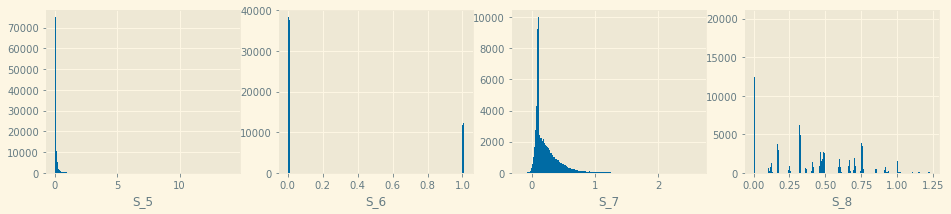

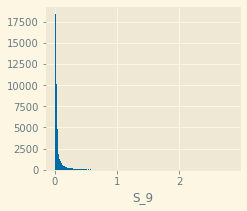

In [37]:
cont_features = sorted([f for f in eda.columns if f not in cat_features + ['customer_ID', 'target', 'S_2']])
print(len(cont_features))
# print(cont_features)
ncols = 4
for i, f in enumerate(cont_features):
    if i % ncols == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Continuous Features', fontsize=20, y=1.02)
    plt.subplot(1, ncols, i % ncols + 1)
    plt.hist(eda[f], bins=200)
    plt.xlabel(f)
plt.savefig('figs/cont_vars.png', dpi=425, bbox_inches='tight')
plt.show()

# Duration of Customer Data

In [44]:
customer = eda.groupby(['customer_ID','target']).size().reset_index().rename(columns={0:'months'})
customer.head()

,customer_ID,target,months
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,13
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0,13
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0,13
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0,13
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0,13


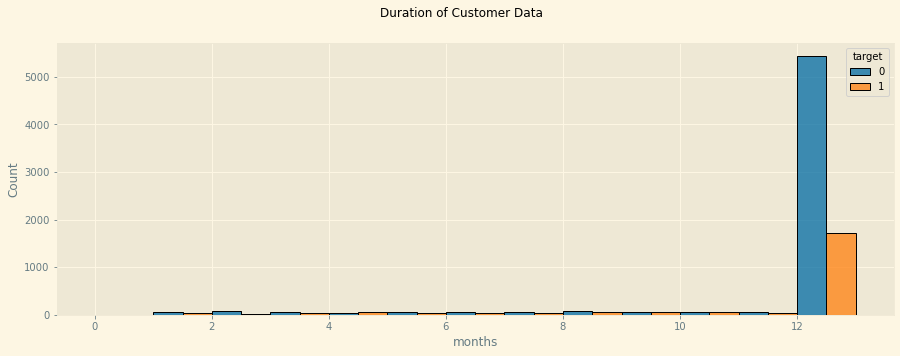

In [45]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
sns.histplot(x='months', data=customer, hue='target', stat='count', multiple="dodge", bins=np.arange(0,14), ax=ax)
# ax.bar_label(ax.containers[0], fmt='%.f%%')
# ax.bar_label(ax.containers[1], fmt='%.f%%')
plt.suptitle("Duration of Customer Data")
plt.savefig('figs/customer.png', dpi=425, bbox_inches='tight')
plt.show()

In [47]:
pickle.dump(eda, open("pickle/eda.pkl", "wb"))
pickle.dump(null_hist, open("pickle/nulls.pkl", "wb"))
pickle.dump(cat_features, open("pickle/cat_features.pkl", "wb"))